In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import math

In [0]:
def numerical_simulation(vx, h, g, dt):
  t = 0
  x, y = [], []
  s = 0
  vy = 0
  while h >= 0:
    s += vx * dt
    vy += g * dt
    h += vy * dt
    if h < 0:
      break
    x.append(s)
    y.append(h)
    t += dt
  return x, y, t

In [0]:
def analytical_simulation(vx, h0, g, dt, angle):
  v0 = vx
  t = 0
  x, y = [], []
  s = 0
  h = h0
  angle_rad = math.radians(angle)
  while h >= 0:
    s = v0 * np.cos(angle_rad) * t
    h = h0 + (0.5 * g * (t ** 2))
    t += dt
    if h < 0:
      break
    x.append(s)
    y.append(h)
  return x, y

In [0]:
vx0 = 10 #m/s, actual plane boeing 747 920km/h = 255m/s
h = 100 #meter, actual plane 12192 m
g = -9.8
dt = 0.1
angle = 0

xn, yn, tn = numerical_simulation(vx0, h, g, dt)
xa, ya = analytical_simulation(vx0, h, g, dt, angle)

time_numeric = tn
time_analytic = math.sqrt(abs((2*h)/g))

In [0]:
print(time_numeric, time_analytic)
print(abs(time_numeric - time_analytic))

4.4 4.5175395145262565
0.1175395145262561


## Grafik

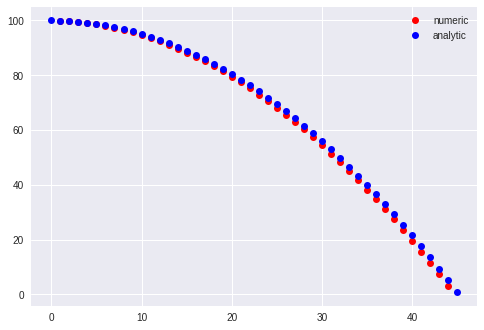

In [0]:
fig = plt.figure()

plt.plot(xn, yn, 'ro', label='numeric')
plt.plot(xa, ya, 'bo', label='analytic')
plt.legend(loc='best')

plt.show()

## Video

In [0]:
fig = plt.figure() 
ax = plt.axes(xlim=(0, 50), ylim=(0, 100)) 
line, = ax.plot([], [], lw=2) 

def init(): 
  # empty plot/frame 
  line.set_data([], []) 
  return line, 

xdata, ydata = [], [] 

def animate(i):
  x = xn[i]
  y = yn[i]

  xdata.append(x) 
  ydata.append(y)  

  line.set_data(xdata, ydata) 

  return line,

plt.title('Animasi Gerak Benda Jatuh dari Pesawat')
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(xn), interval=200, blit=True) 
anim.save('tubes1mosi.mp4', writer = 'ffmpeg', fps = 30)
plt.show()
